# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Example1 - A simple cost function

## $f(x) = x^2 + x + 1$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=100)

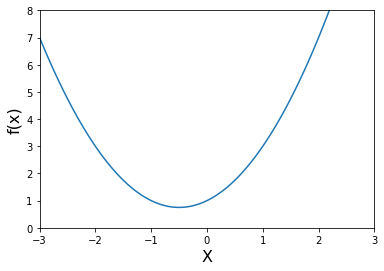

In [4]:
#Plot
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivitives

In [5]:
def df(x):
    return 2*x+1

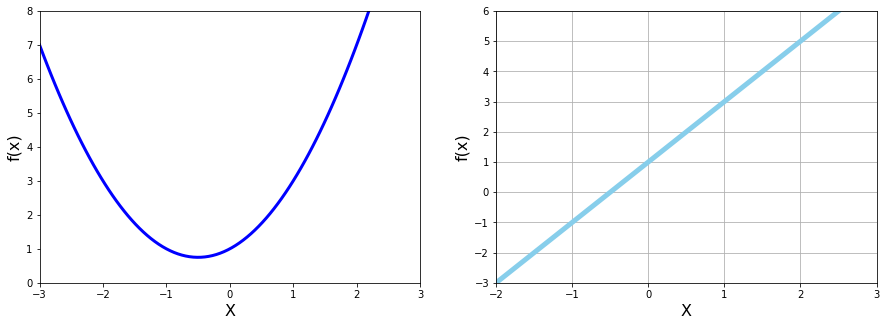

In [6]:
#Plot function and derivative side by side

plt.figure(figsize=[15,5])

#1 Chart: cost function
plt.subplot(1,2,1)


plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

#2 Chart: Derivative
plt.subplot(1,2,2)

plt.xlim([-2,3])
plt.ylim([-3,6])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.grid()

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)
plt.show()

# Python Loops & Gradient Descent

In [7]:
# Python for Loop
for n in range(5):
    print('Hello world')

Hello world
Hello world
Hello world
Hello world
Hello world


In [8]:
# Python while loop
counter = 0
while counter < 7:
    print('counting....', counter)
    counter = counter + 1
    
print('Done looping')

counting.... 0
counting.... 1
counting.... 2
counting.... 3
counting.... 4
counting.... 5
counting.... 6
Done looping


In [9]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    step_size = abs(new_x - previous_x)
    #print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    #print(gradient)
    if step_size < precision:
        print('Loop ran this many times: ', n)
        break
    
print('Local minimum occurs at: ', new_x)
print('Slope or df(x) value at this point is: ', df(new_x))
print('f(x) value or cost at this point is: ', f(new_x))
    

Loop ran this many times:  50
Local minimum occurs at:  -0.49996003706460423
Slope or df(x) value at this point is:  7.992587079153068e-05
f(x) value or cost at this point is:  0.7500000015970362


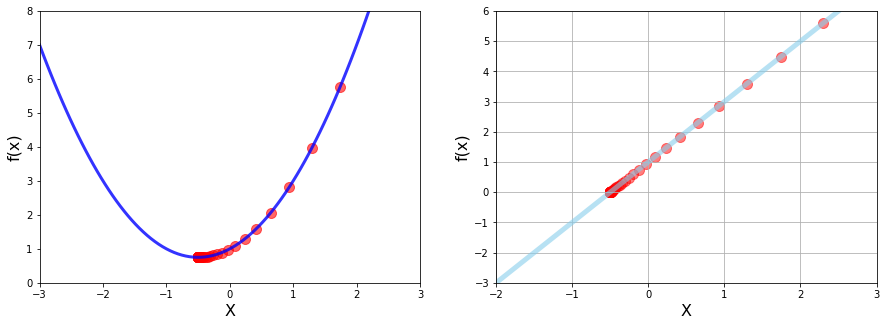

In [10]:
#superimpose the gradient descent calculations on plot

plt.figure(figsize=[15,5])

#1 Chart: cost function
plt.subplot(1,2,1)


plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6 )

#2 Chart: Derivative
plt.subplot(1,2,2)

plt.xlim([-2,3])
plt.ylim([-3,6])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.grid()

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s= 100, alpha = 0.5)
plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [11]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

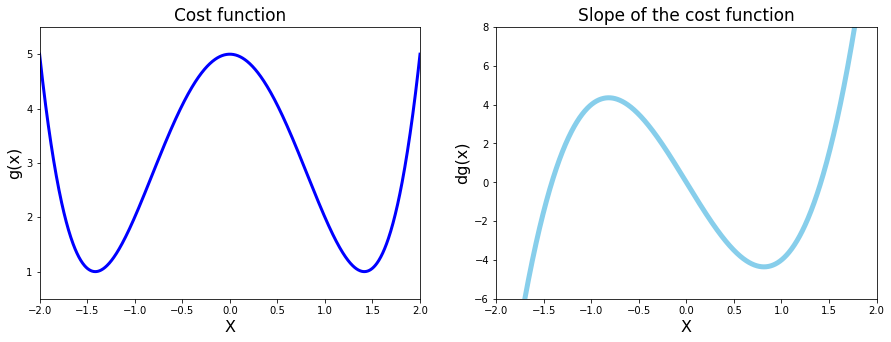

In [12]:
#Plot function and derivative side by side

plt.figure(figsize=[15,5])

#1 Chart: cost function
plt.subplot(1,2,1)


plt.xlim([-2,2])
plt.ylim([0.5,5.5])

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)

#2 Chart: Derivative
plt.subplot(1,2,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.xlim([-2,2])
plt.ylim([-6,8])


plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)
plt.show()

## Gradient Descent as a Python Function

In [13]:
def gradient_descent(derivative_func, 
                     intial_guess, 
                     multiplier=0.02, 
                     precision=0.001,
                     max_iter=300):
    new_x = intial_guess

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient
        step_size = abs(new_x - previous_x)
 

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        #print(gradient)
        if step_size < precision:
            break

    return new_x, x_list, slope_list

In [14]:
local_min, list_x, deriv_list = gradient_descent(derivative_func =dg, 
                                                 intial_guess = -0.1)
print('Local min occurs at: ', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at:  -1.4120887490901561
Number of steps:  34


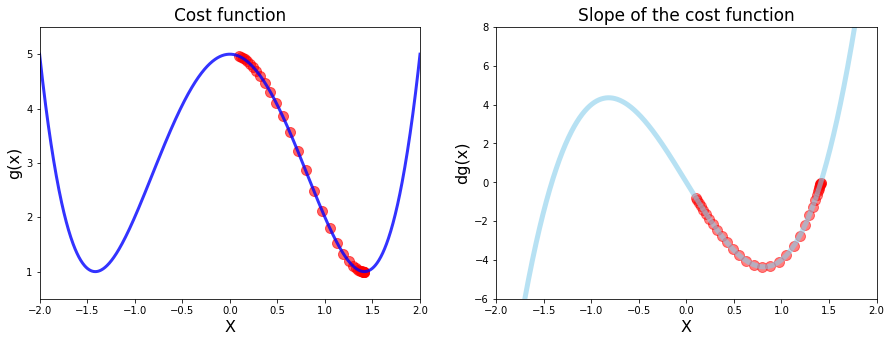

In [15]:
#Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func =dg, 
                                                 intial_guess = 0.1)

# Plot function derivative and scatter plot side by side

plt.figure(figsize=[15,5])

#1 Chart: cost function
plt.subplot(1,2,1)


plt.xlim([-2,2])
plt.ylim([0.5,5.5])

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red',s=100, alpha=0.6)

#2 Chart: Derivative
plt.subplot(1,2,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.xlim([-2,2])
plt.ylim([-6,8])


plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)
plt.show()

# Example 3 - Divergence, Overflow and Python Tupels
## $$(x) = x^5 = 2x^4 + 2$$

In [16]:
#Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=100)
def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

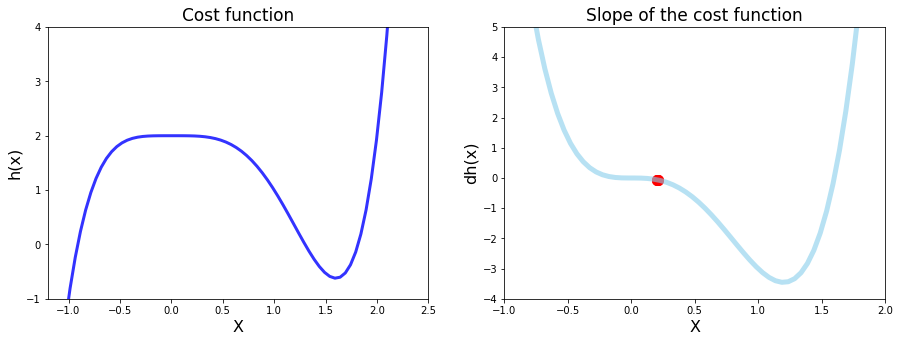

In [17]:
#Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func =dh, 
                                                 intial_guess = 0.2,
                                                max_iter=10)

# Plot function derivative and scatter plot side by side

plt.figure(figsize=[15,5])

#1 Chart: cost function
plt.subplot(1,2,1)


plt.xlim([-1.2,2.5])
plt.ylim([-1,4])

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red',s=100, alpha=0.6)

#2 Chart: Derivative
plt.subplot(1,2,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.xlim([-1,2])
plt.ylim([-4,5])


plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)
plt.show()



## Python Tuples


In [18]:
# Creating a tuple
breakfast = 'bacon', 'eggs', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17
print('I love ', breakfast[0])

I love  bacon
